In [ ]:
!pip install catboost

In [ ]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import xgboost as xgb

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.metrics import log_loss
from google.colab import files
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingRegressor
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from lightgbm.sklearn import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Lectura y Filtrado

In [ ]:
short_df = pd.read_csv( "/content/drive/MyDrive/Orga Datos/TP2/DataFrame_train_encoded_2.csv" )
short_df.drop(columns='Unnamed: 0', inplace=True)
short_df

,Region_APAC,Region_Americas,Region_EMEA,Region_Japan,Region_Middle East,Total_Amount,TRF,"Pricing, Delivery_Terms_Approved","Pricing, Delivery_Terms_Quote_Appr",Decision
0,0.0,0.0,1.0,0.0,0.0,15.635076,10.0,1.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,10.940740,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,11.336971,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,15.819943,14.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,16.407566,25.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
16767,0.0,0.0,1.0,0.0,0.0,11.702880,0.0,1.0,1.0,1.0
16768,0.0,0.0,1.0,0.0,0.0,11.597520,0.0,1.0,1.0,1.0
16769,0.0,0.0,1.0,0.0,0.0,11.702880,0.0,1.0,1.0,1.0
16770,0.0,1.0,0.0,0.0,0.0,14.668562,4.0,1.0,1.0,0.0


In [ ]:
test = pd.read_csv( "/content/drive/MyDrive/Orga Datos/TP2/DataFrame_test_encoded_2.csv" )
opportunity_id = pd.DataFrame()
opportunity_id['Opportunity_ID'] = test['Opportunity_ID'] 
test.drop(columns=['Opportunity_ID', 'Unnamed: 0'], inplace=True)
test

,Region_APAC,Region_Americas,Region_EMEA,Region_Japan,Region_Middle East,Total_Amount,TRF,"Pricing, Delivery_Terms_Approved","Pricing, Delivery_Terms_Quote_Appr"
0,0.0,0.0,1.0,0.0,0.0,11.905436,0.0,1.0,1.0
1,0.0,0.0,1.0,0.0,0.0,11.787392,0.0,1.0,1.0
2,0.0,1.0,0.0,0.0,0.0,9.954062,0.0,1.0,1.0
3,0.0,1.0,0.0,0.0,0.0,12.338534,1.0,1.0,1.0
4,0.0,1.0,0.0,0.0,0.0,8.657390,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1562,0.0,0.0,1.0,0.0,0.0,11.733987,0.0,1.0,1.0
1563,0.0,1.0,0.0,0.0,0.0,10.715637,0.0,1.0,1.0
1564,0.0,1.0,0.0,0.0,0.0,11.514145,0.0,1.0,1.0
1565,0.0,1.0,0.0,0.0,0.0,11.872137,0.0,1.0,1.0


In [ ]:
opportunity_id

,Opportunity_ID
0,10689
1,10690
2,10691
3,10692
4,10693
...,...
1562,12364
1563,12365
1564,12366
1565,12367


# Split

In [ ]:
X = short_df.drop( 'Decision', axis=1 )
y = short_df['Decision']
X

,Region_APAC,Region_Americas,Region_EMEA,Region_Japan,Region_Middle East,Total_Amount,TRF,"Pricing, Delivery_Terms_Approved","Pricing, Delivery_Terms_Quote_Appr"
0,0.0,0.0,1.0,0.0,0.0,15.635076,10.0,1.0,1.0
1,0.0,0.0,1.0,0.0,0.0,10.940740,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,11.336971,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,15.819943,14.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,16.407566,25.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
16767,0.0,0.0,1.0,0.0,0.0,11.702880,0.0,1.0,1.0
16768,0.0,0.0,1.0,0.0,0.0,11.597520,0.0,1.0,1.0
16769,0.0,0.0,1.0,0.0,0.0,11.702880,0.0,1.0,1.0
16770,0.0,1.0,0.0,0.0,0.0,14.668562,4.0,1.0,1.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Linear Regresion

In [ ]:
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression(normalize=True)


In [ ]:
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
LinReg_pred = regr.predict(X_test)

In [ ]:
loss = log_loss(y_test, LinReg_pred)
print(f"Log loss is {loss}")

Log loss is 0.5937887350235301


# RandomForest

In [ ]:
rfg = RandomForestRegressor()

In [ ]:
rfg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rfg_pred = rfg.predict(X_test)

In [ ]:
loss = log_loss(y_test, rfg_pred)
print(f"Log loss is {loss}")

Log loss is 1.0784333674036046


# XGBoost

In [ ]:
xg_Regressor1 = xgb.XGBRegressor(colsample_bytree= 0.8, gamma= 1.5, learning_rate= 0.01, max_depth= 20, min_child_weight= 1, n_estimators= 200, subsample= 0.8)

In [ ]:
xg_Regressor1.fit(X_train,y_train)

[21:43:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=1.5,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=20, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=1)

In [ ]:
xgbr = xg_Regressor1.predict(X_test)

In [ ]:
loss = log_loss(y_test, xgbr)
print(f"Log loss is {loss}")

Log loss is 0.44270637285983006


# CatBoost

In [ ]:
cbr = CatBoostRegressor(num_boost_round = 1500, learning_rate = 0.009)
#cbr = CatBoostRegressor(num_boost_round = 1500, depth= 10, l2_leaf_reg= 20, learning_rate= 0.1)

cbr.fit(X_train, y_train)

In [ ]:
cbr_pred = cbr.predict(X_test)

In [ ]:
loss = log_loss(y_test, cbr_pred)
print(f"Log loss is {loss}")

Log loss is 0.4350221468711731


['Region_APAC', 'Region_Americas', 'Region_EMEA', 'Region_Japan', 'Region_Middle East', 'Total_Amount', 'TRF', 'Pricing, Delivery_Terms_Approved', 'Pricing, Delivery_Terms_Quote_Appr']


Text(0.5, 0, 'Relative Importance')

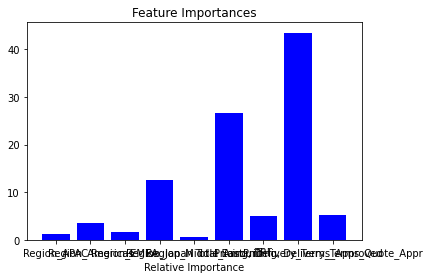

In [ ]:
features = X_test.columns.to_list()
importances = cbr.feature_importances_
indices = np.argsort(importances)

print(features)


plt.figure(1)
plt.title('Feature Importances')
plt.bar(features, importances, color='b', align='center')
plt.xlabel('Relative Importance')

# LightBM

In [ ]:
lbm = LGBMRegressor(boosting_type = "goss", n_estimators = 1100, learning_rate = 0.008, random_state = 123)

In [ ]:
lbm.fit(X_train, y_train)

LGBMRegressor(boosting_type='goss', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.008, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
lbm_pred = lbm.predict(X_test)

In [ ]:
loss = log_loss(y_test, lbm_pred)
print(f"Log loss is {loss}")

Log loss is 0.4350221468711731


# KNN

In [ ]:
n_neighbors = 6

knn = KNeighborsRegressor(n_neighbors, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')

In [ ]:
knn_pred = knn.predict(X_test)

In [ ]:
loss = log_loss(y_test, knn_pred)
print(f"Log loss is {loss}")

Log loss is 1.453461443224661


# Ensamblando

In [ ]:
# Modelos totales: ('rfg', rfg), ('lbm', lbm),('xgbr', xg_Regressor1), ('lr', regr), ('cbr', cbr), ('knn', knn)
ereg = VotingRegressor([ ('rfg', rfg), ('xgbr', xg_Regressor1), ('cbr', cbr) ])
ereg.fit(X_train, y_train)

In [ ]:
ereg_pred = ereg.predict(X_test)

In [ ]:
loss = log_loss(y_test, ereg_pred)
print(f"Log loss is {loss}")

Log loss is 0.41665219201598114


In [ ]:
ereg.score(X_test, y_test)

0.45582409955633385

In [ ]:
ensamble = ereg.predict(test)

In [ ]:
resultado = pd.DataFrame()
resultado['Opportunity_ID'] = opportunity_id['Opportunity_ID']
resultado['target'] = ensamble
resultado.sort_values('Opportunity_ID',inplace = True)
resultado = resultado.drop_duplicates('Opportunity_ID',keep = 'last')
resultado.set_index('Opportunity_ID', inplace = True)
resultado

,target
Opportunity_ID,
10689,0.469994
10690,0.351221
10691,0.547957
10692,0.506499
10693,0.544826
...,...
12364,0.579505
12365,0.465145
12366,0.541459


In [ ]:
csv3 = resultado.to_csv('ensamble1.csv')
#files.download('ensamble1.csv')

No handles with labels found to put in legend.


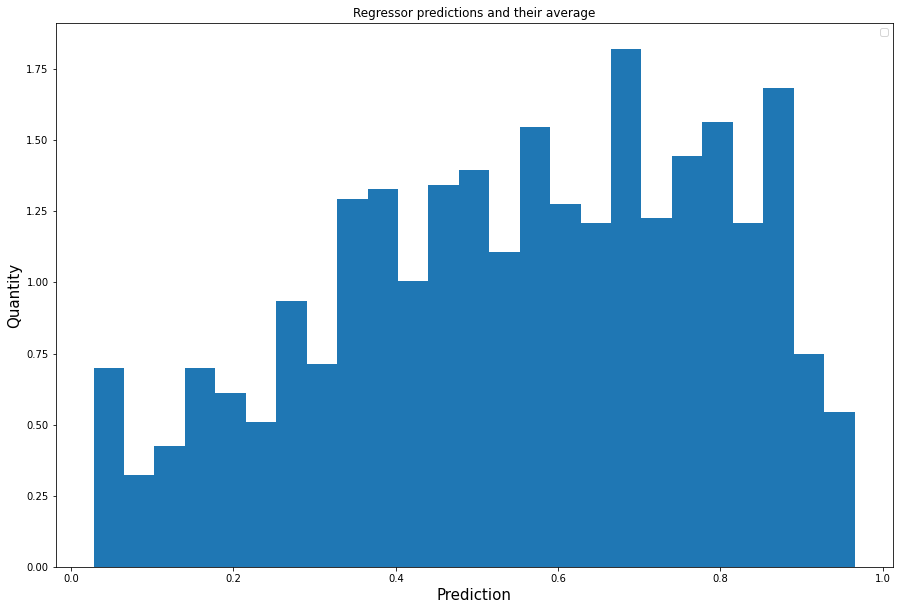

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(ensamble, bins=25, density=True)

#plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel('Quantity',  fontsize=15)
plt.xlabel('Prediction',  fontsize=15)
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.show()

Text(0.5, 0, 'Territorios')

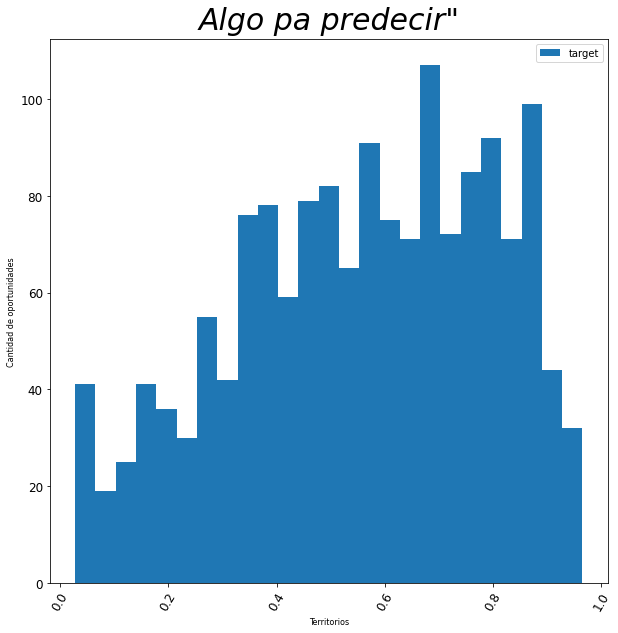

In [ ]:
grafiquito = resultado.plot(kind='hist', figsize=(10,10), bins=25, rot=60, fontsize=12)
ax = plt.gca()
plt.title('Algo pa predecir"', fontsize=30, fontstyle='oblique', pad=10)
ax.set_ylabel('Cantidad de oportunidades',fontsize=8)
ax.set_xlabel('Territorios', fontsize=8)